<a href="https://colab.research.google.com/github/LilySu/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np

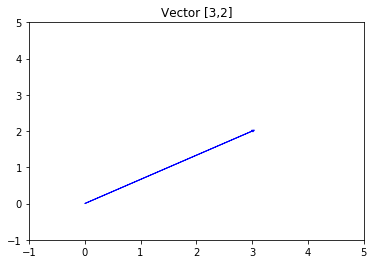

In [166]:
# Scaling vectors with Scalars
import math
import matplotlib.pyplot as plt
# Start with a simple vector
blue = [3, 2]

plt.arrow(0,0, blue[0], blue[1],head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Vector [3,2]")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b = [17,-4,-2,1]

In [168]:
np.linalg.norm(b)

17.60681686165901

The norm of a vector represents the length, or magnitude of the vector. In Machine Learning, it is a regularization method.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = [3,7,-2,12]
d = [9,-7,4,6]

In [160]:
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = [[7,4,2],
     [1,3,-1],
     [2,6,-4]]
 

In [157]:
np.linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [158]:
np.transpose(E)

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [144]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [150]:
##### Your Code Here #####
import numpy as np
print('mean of customers:{}'.format(np.mean(df['customers'])))
print('mean of snow:{}'.format(np.mean(df['snow'])))
print('variance of customers:{}'.format(np.var(df['customers'])))
print('variance of snow:{}'.format(np.var(df['snow'])))
print('standard deviation of customers:{}'.format(np.std(df['customers'])))
print('standard deviation of snow:{}'.format(np.std(df['snow'])))

mean of customers:1135.7142857142858
mean of snow:2.7142857142857144
variance of customers:84653.06122448981
variance of snow:7.346938775510203
standard deviation of customers:290.95199127087926
standard deviation of snow:2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [153]:
import scipy.stats as stats
stats.stats.f_oneway(df['customers'],df['snow'])

F_onewayResult(statistic=90.97681155926678, pvalue=5.954628350464478e-07)

Yes comparable because the p-value is too large to reject the null hypothesis that inches of snow and customers are comparable.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [154]:
np.cov(df)

array([[ 336200. ,  311190. ,  509630. ,  405490. ,  442800. ,  592040. ,
         654360. ],
       [ 311190. ,  288040.5,  471718.5,  375325.5,  409860. ,  547998. ,
         605682. ],
       [ 509630. ,  471718.5,  772524.5,  614663.5,  671220. ,  897446. ,
         991914. ],
       [ 405490. ,  375325.5,  614663.5,  489060.5,  534060. ,  714058. ,
         789222. ],
       [ 442800. ,  409860. ,  671220. ,  534060. ,  583200. ,  779760. ,
         861840. ],
       [ 592040. ,  547998. ,  897446. ,  714058. ,  779760. , 1042568. ,
        1152312. ],
       [ 654360. ,  605682. ,  991914. ,  789222. ,  861840. , 1152312. ,
        1273608. ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [116]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()


In [120]:
fitted = scaler.fit_transform(df[["Cheese",
        "Carcass_Meat", 
        "Other_Meat", 
        "Fish", 
        "Fats_and_Oils", 
        "Sugars", 
        "Fresh_Potatoes", 
        "Fresh_Veg", 
        "Other_Veg", 
        "Processed_Potatoes", 
        "Processed_Veg", 
        "Fresh_Fruit", 
        "Cereals", 
        "Beverages", 
        "Soft_Drinks", 
        "Alcoholic Drinks", 
        "Confectionery"]])
fitted

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

# Standard Deviation of 1

In [122]:
fitted.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [132]:
fitted.mean(axis=0)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.93889390e-18, -5.55111512e-17,  0.00000000e+00,  5.55111512e-17,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17,  0.00000000e+00,
        6.93889390e-18, -5.55111512e-17, -2.77555756e-17,  0.00000000e+00,
        5.55111512e-17])

In [138]:
scaler.mean_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.93889390e-18, -5.55111512e-17,  0.00000000e+00,  5.55111512e-17,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17,  0.00000000e+00,
        6.93889390e-18, -5.55111512e-17, -2.77555756e-17,  0.00000000e+00,
        5.55111512e-17])

In [0]:
scaled = pd.DataFrame({"Cheese":fitted[:,0],"Carcass_Meat":fitted[:,1],"Other_Meat":fitted[:,2],"Fish":fitted[:,3],"Fats_and_Oils":fitted[:,4],"Sugars":fitted[:,5],"Fresh_Potatoes":fitted[:,6],"Fresh_Veg":fitted[:,7],"Other_Veg":fitted[:,8],"Processed_Potatoes":fitted[:,9],"Processed_Veg":fitted[:,10],"Fresh_Fruit":fitted[:,11],"Cereals":fitted[:,12],"Beverages":fitted[:,13],"Soft_Drinks":fitted[:,14],"Alcoholic Drinks":fitted[:,15],"Confectionery":fitted[:,16]})


In [125]:
scaled

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [129]:
scaled.std(axis=1)

0    0.515924
1    0.912886
2    0.832906
3    1.066019
dtype: float64

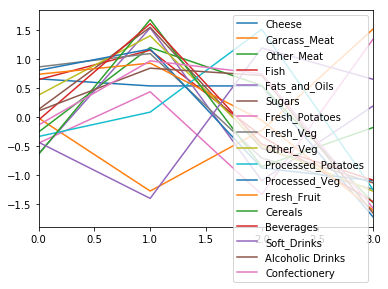

In [133]:
scaled.plot()

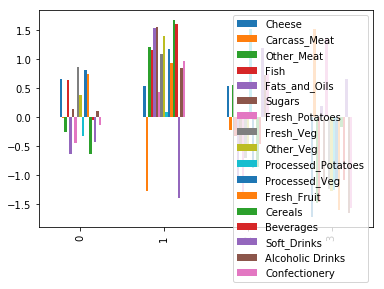

In [135]:
scaled.plot.bar()

#PCA

In [0]:
X=fitted

In [137]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
print("Data: \n", X)

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(X)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)

Data: 
 [[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]

 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767

In [0]:
# from sklearn import preprocessing
# import numpy as np

In [140]:
df[["Cheese", 
        "Carcass_Meat", 
        "Other_Meat", 
        "Fish", 
        "Fats_and_Oils", 
        "Sugars", 
        "Fresh_Potatoes", 
        "Fresh_Veg", 
        "Other_Veg", 
        "Processed_Potatoes", 
        "Processed_Veg", 
        "Fresh_Fruit", 
        "Cereals", 
        "Beverages", 
        "Soft_Drinks", 
        "Alcoholic Drinks", 
        "Confectionery"]] = scaler.fit_transform(df[["Cheese", 
        "Carcass_Meat", 
        "Other_Meat", 
        "Fish", 
        "Fats_and_Oils", 
        "Sugars", 
        "Fresh_Potatoes", 
        "Fresh_Veg", 
        "Other_Veg", 
        "Processed_Potatoes", 
        "Processed_Veg", 
        "Fresh_Fruit", 
        "Cereals", 
        "Beverages", 
        "Soft_Drinks", 
        "Alcoholic Drinks", 
        "Confectionery"]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Mean = 0 

In [142]:
df[["Cheese", 
        "Carcass_Meat", 
        "Other_Meat", 
        "Fish", 
        "Fats_and_Oils", 
        "Sugars", 
        "Fresh_Potatoes", 
        "Fresh_Veg", 
        "Other_Veg", 
        "Processed_Potatoes", 
        "Processed_Veg", 
        "Fresh_Fruit", 
        "Cereals", 
        "Beverages", 
        "Soft_Drinks", 
        "Alcoholic Drinks", 
        "Confectionery"]].describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# define a matrix (we'll pretend that we've already separated our X and Y matrices)
X = array([[1, 2], [3, 4], [5, 6]])
print("Data: ", X)

# calculate the mean of each column
means = mean(X.T, axis=1)
print("\n Means: \n", means)

# center columns by subtracting column means
centered_data = X - means
print("\n Centered Data: \n", centered_data)

# calculate covariance matrix of centered matrix
# We're not going to find the covaraince matrix by the (Z^T)(Z) method, I trust this function more
covariance_matrix = cov(centered_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)

# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)

# project data
P = vectors.T.dot(centered_data.T)
print("\n Projected Data: \n", P.T)

In [0]:
x = [1,3,5] 
y = [2,4,6]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data Before PCA")
plt.show()

In [0]:
x = [-2.82842712,0,2.82842712] 
y = [0,0,0]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from scipy.spatial.distance import cdist

In [32]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [33]:
# Calculate the centroid of the entire dataset (only for demonstration purposes)
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

-2.32329816340267 -3.4228690080745237


In [34]:
centroids = points.sample(4)
centroids.head()

,x,y
186,-9.770175,-4.561341
122,-4.541241,-10.030478
33,6.841547,2.625421
155,-4.072158,5.013310


In [35]:
from scipy.spatial.distance import cdist

def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
allclusters = find_nearest_centroid(points, centroids)
allclusters.head()

,x,y,cluster0,cluster1,cluster2,cluster3,cluster4
0,-7.846803,-3.421277,0,0,0,0,0
1,-3.554323,-6.884729,1,1,1,1,1
2,-0.192822,-9.671030,1,1,1,1,1
3,-6.401456,-5.223972,0,0,1,1,1
4,-0.804026,-9.704457,1,1,1,1,1


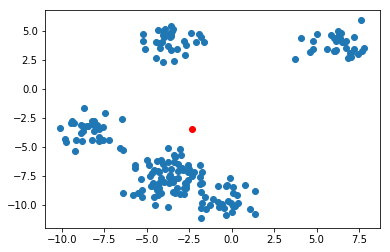

In [36]:
fig, ax = plt.subplots()
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

In [15]:
centroids

,x,y
198,-1.783078,-8.890394
162,-3.471184,5.114251
71,-3.931094,-6.930744
145,-4.299739,3.915591


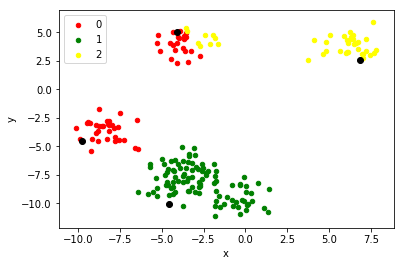

In [38]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
#   plt.axes().set_aspect('equal')
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(allclusters, 'cluster1', centroids)